## Importing libraries and reading required images

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from scipy import signal
import math

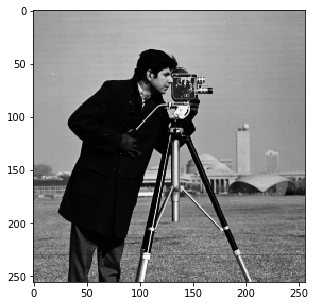

In [7]:
# Read the image and be sure it is grayscale
im_path = 'cameraman.png'
cman = io.imread(im_path)
cman = rgb2gray(cman)

# Ensure the image is a float in the range [0-1]
cman = ((cman - np.min(cman)) * (1/(np.max(cman) - np.min(cman)) *1.0)).astype('float')

# Show the image
fig1 = plt.figure(figsize = (5,5))
plt.imshow(cman, cmap='gray')

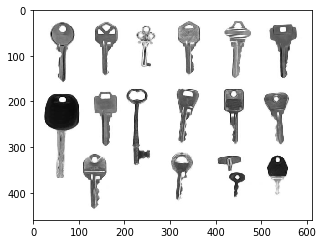

In [3]:
# Read the image and be sure it is grayscale
im_path2 = 'multiplekeys.png'
keys = io.imread(im_path2)
keys = rgb2gray(keys)

# Ensure the image is a float in the range [0-1]
keys = ((keys - np.min(keys)) * (1/(np.max(keys) - np.min(keys)) *1.0)).astype('float')

# Show the image
fig1 = plt.figure(figsize = (5,5))
plt.imshow(keys, cmap='gray')

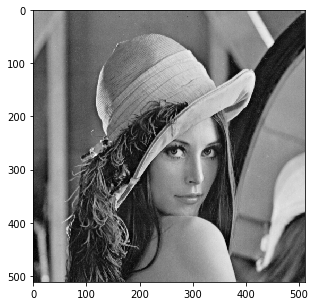

In [9]:
# Read the image and be sure it is grayscale
lena_path = 'lena.png'
lena = io.imread(lena_path)
lena = rgb2gray(lena)

# Ensure the image is a float in the range [0-1]
lena = ((lena - np.min(lena)) * (1/(np.max(lena) - np.min(lena)) *1.0)).astype('float')

# Show the image
fig1 = plt.figure(figsize = (5,5))
plt.imshow(lena, cmap='gray')


# A1a) Image Denoising 

### Box filter 

In [10]:
# Create an nxn box filter
def create_box_filter(n):
    
    # Make sure the filter is an odd size
    if (n%2 == 0):
        n += 1
        
    # Create a blank filter nxn
    filter_out = np.zeros((n,n))
    
    # Sampling the box-filter function, sampling is centered in the middle of the filter, not useful for box filter
    x_sampling = np.linspace(-(n-1)/2, (n-1)/2, n)
    y_sampling = np.linspace(-(n-1)/2, (n-1)/2, n)
   
    # Fill in the filter
    val = 1/n*n
    
    for x in range(0, len(x_sampling)):
        for y in range(0, len(y_sampling)):
            # Sample the function at our precomputed sampling locations
            filter_out[x,y] = val
            
    # Normalize the filter (sum to 1)
    filter_out = filter_out / np.sum(filter_out.flatten())
    
    return filter_out

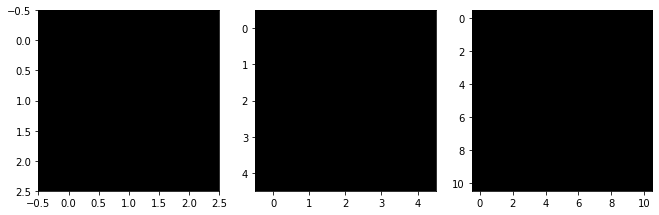

In [29]:
# Create a small and large, odd and even filter
box_small = create_box_filter(3)
box_med = create_box_filter(5)
box_large = create_box_filter(11)

plt.subplots(1,3,figsize=(11,11))
plt.subplot(1,3,1)
plt.imshow(box_small, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(box_med, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(box_large, cmap='gray')

## Gaussian Filter 

In [12]:
# Create an nxn box filter
def create_gaussian_filter(sigma):
    # Finding n using 3*sigma rule
    n = 2*math.floor(3*sigma)+1
    
    # Make sure the filter is an odd size
    if (n%2 == 0):
        n += 1
        
    # Create a blank filter nxn
    filter_out = np.zeros((n,n))
    
    # Sampling the box-filter function, sampling is centered in the middle of the filter
    x_sampling = np.linspace(-(n-1)/2, (n-1)/2, n)
    y_sampling = np.linspace(-(n-1)/2, (n-1)/2, n)
    
    val = 1/(2*3.14159*sigma*sigma)
    for x in range(0, len(x_sampling)):
        for y in range(0, len(y_sampling)):
            # Sample the function at our precomputed sampling locations
            filter_out[x,y] = val*math.exp(-(math.pow(x_sampling[x],2) + math.pow(y_sampling[y],2))/(2*sigma*sigma))
            
    # Normalize the filter (sum to 1)
    filter_out = filter_out / np.sum(filter_out.flatten())
    
    return filter_out

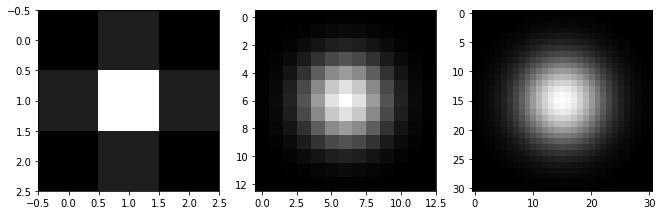

In [27]:
# Create a small and large, odd and even filter
gaus_small = create_gaussian_filter(0.5)
gaus_med = create_gaussian_filter(2)
gaus_large = create_gaussian_filter(5)

plt.subplots(1,3,figsize=(11,11))
plt.subplot(1,3,1)
plt.imshow(gaus_small, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(gaus_med, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(gaus_large, cmap='gray')

## Convolution

In [18]:
def convolution2D(f, I):
    # Handle boundary of I, e.g. pad I according to size of f
    val = int((f.shape[0] - 1)/2)
    I_padded = np.zeros((I.shape[0] + val + val , I.shape[1] + val + val))
    I_padded[val:-val, val:-val] = I
    
    # Convoluted image output
    I_c = np.zeros_like(I)
    
    #filter is flipped in both x and y axis
    f = np.flipud(np.fliplr(f))
    
    # Compute I_convoluted = f*I
    for x in range(I.shape[0]):
        for y in range(I.shape[1]):
            # element-wise multiplication of the filter and the image boxes
            I_c[x, y] = (f*I_padded[x: x + f.shape[0], y: y + f.shape[1]]).sum()
    
    I2 = ((I_c - np.min(I_c)) * (1/(np.max(I_c) - np.min(I_c)) * 1.0)).astype('float')
    return I2

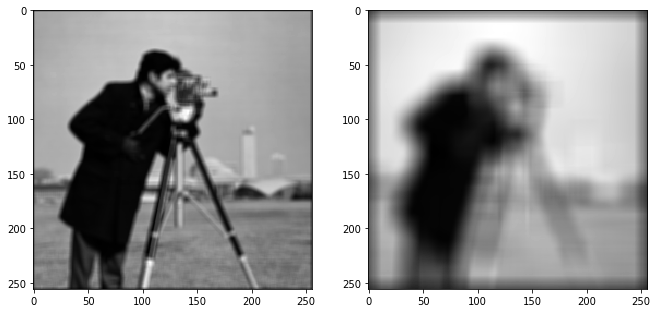

In [19]:
# Convolve our test image with the filters using self made convolution filter 
out_box_small = convolution2D(fbox_small, cman)
out_box_large = convolution2D(fbox_large, cman)

# Take a look at the results
plt.subplots(1,2,figsize=(11,11))

plt.subplot(1,2,1)
plt.imshow(out_box_small, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(out_box_large, cmap='gray')

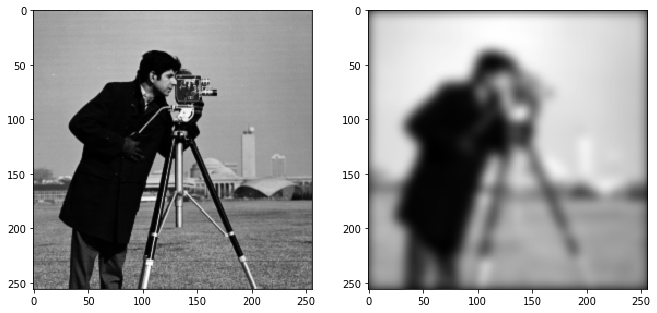

In [167]:
# Convolve our test image with the filters using self made convolution filter 
out_gaussian_small = convolution2D(fg_small, im)
out_gaussian_large = convolution2D(fg_large, im)

# Take a look at the results
plt.subplots(1,2,figsize=(11,11))

plt.subplot(1,2,1)
plt.imshow(out_gaussian_small, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(out_gaussian_large, cmap='gray')

## Median Filter 

In [20]:
def median_filtering(I, n):
    # Make sure the filter is an odd size
    if (n%2 == 0):
        n += 1
        
    val = int((n - 1)/2)
    
    # Handle boundary of I, e.g. pad I according to size n
    I_padded = np.zeros((I.shape[0] + val + val , I.shape[1] + val + val))
    I_padded[val:-val, val:-val] = I
    
    # Denoised image output and temp array
    I_c = np.zeros_like(I)
    arr = []
    
    # Denoise image with an nxn median filter
    for x in range(I.shape[0]):
        for y in range(I.shape[1]):
            for i in range (-val, val+1):
                for j in range (-val, val+1):
                    arr.append(I_padded[x+i,y+j])
        
            arr.sort()
            I_c[x, y] = arr[len(arr)//2]
            arr = []
            
    denoised_im = ((I_c - np.min(I_c)) * (1/(np.max(I_c) - np.min(I_c)) * 1.0)).astype('float')
    
    return denoised_im

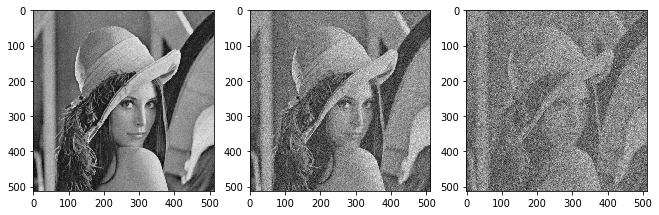

In [23]:
sigma_low = 0.03
lena_noise_low = lena + sigma_low*np.random.randn(*lena.shape)
sigma_med = 0.1
lena_noise_med = lena + sigma_med*np.random.randn(*lena.shape)
sigma_high = 0.3
lena_noise_high = lena + sigma_high*np.random.randn(*lena.shape)

plt.subplots(1,3,figsize=(11,11))
plt.subplot(1,3,1)
plt.imshow(lena_noise_low, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(lena_noise_med, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(lena_noise_high, cmap='gray')

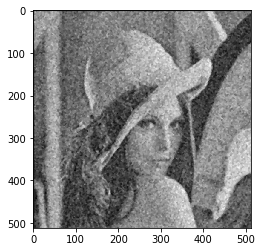

In [26]:
dnl = median_filtering(lena_noise_high, 5)
plt.imshow(dnl, cmap='gray')

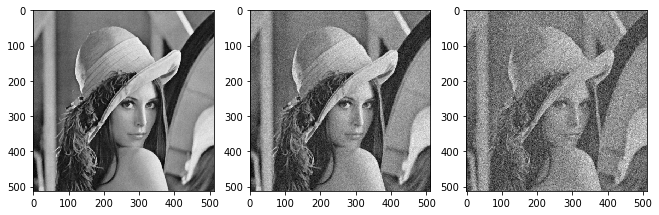

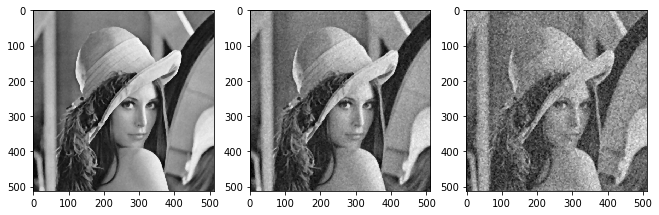

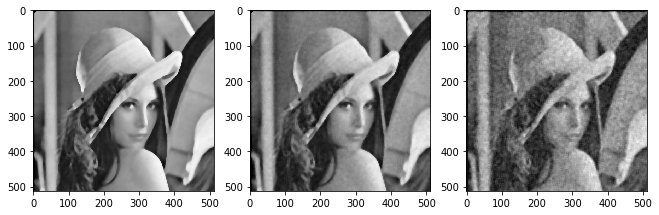

In [32]:
med_s_l = median_filtering(lena_noise_low, 3)
med_s_m = median_filtering(lena_noise_med, 3)
med_s_h = median_filtering(lena_noise_high, 3)

med_m_l = median_filtering(lena_noise_low, 5)
med_m_m = median_filtering(lena_noise_med, 5)
med_m_h = median_filtering(lena_noise_high, 5)

med_l_l = median_filtering(lena_noise_low, 9)
med_l_m = median_filtering(lena_noise_med, 9)
med_l_h = median_filtering(lena_noise_high, 9)

plt.subplots(3,3,figsize=(11,11))
plt.subplot(1,3,1)
plt.imshow(med_s_l, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(med_s_m, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(med_s_h, cmap='gray')
plt.subplots(3,3,figsize=(11,11))
plt.subplot(1,3,1)
plt.imshow(med_m_l, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(med_m_m, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(med_m_h, cmap='gray')
plt.subplots(3,3,figsize=(11,11))
plt.subplot(1,3,1)
plt.imshow(med_l_l, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(med_l_m, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(med_l_h, cmap='gray')

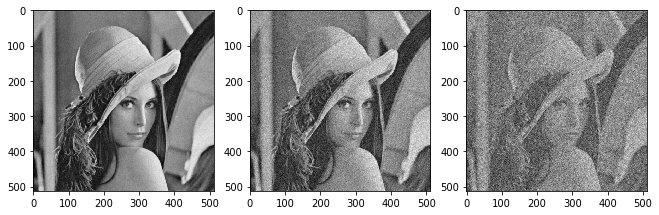

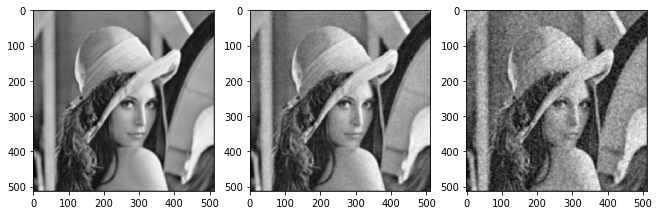

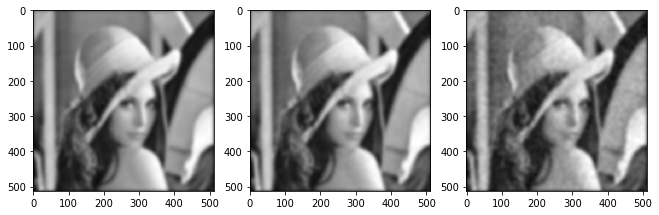

In [31]:
gaus_s_l = convolution2D(gaus_small, lena_noise_low)
gaus_s_m = convolution2D(gaus_small, lena_noise_med)
gaus_s_h = convolution2D(gaus_small, lena_noise_high)

gaus_m_l = convolution2D(gaus_med, lena_noise_low)
gaus_m_m = convolution2D(gaus_med, lena_noise_med)
gaus_m_h = convolution2D(gaus_med, lena_noise_high)

gaus_l_l = convolution2D(gaus_large, lena_noise_low)
gaus_l_m = convolution2D(gaus_large, lena_noise_med)
gaus_l_h = convolution2D(gaus_large, lena_noise_high)

plt.subplots(3,3,figsize=(11,11))
plt.subplot(1,3,1)
plt.imshow(gaus_s_l, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(gaus_s_m, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(gaus_s_h, cmap='gray')
plt.subplots(3,3,figsize=(11,11))
plt.subplot(1,3,1)
plt.imshow(gaus_m_l, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(gaus_m_m, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(gaus_m_h, cmap='gray')
plt.subplots(3,3,figsize=(11,11))
plt.subplot(1,3,1)
plt.imshow(gaus_l_l, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(gaus_l_m, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(gaus_l_h, cmap='gray')

In [ ]:
box_s_l = convolution2D(box_small, lena_noise_low)
box_s_m = convolution2D(box_small, lena_noise_med)
box_s_h = convolution2D(box_small, lena_noise_high)

box_m_l = convolution2D(box_med, lena_noise_low)
box_m_m = convolution2D(box_med, lena_noise_med)
box_m_h = convolution2D(box_med, lena_noise_high)

box_l_l = convolution2D(box_large, lena_noise_low)
box_l_m = convolution2D(box_large, lena_noise_med)
box_l_h = convolution2D(box_large, lena_noise_high)

plt.subplots(3,3,figsize=(11,11))
plt.subplot(1,3,1)
plt.imshow(box_s_l, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(box_s_m, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(box_s_h, cmap='gray')
plt.subplots(3,3,figsize=(11,11))
plt.subplot(1,3,1)
plt.imshow(box_m_l, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(box_m_m, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(box_m_h, cmap='gray')
plt.subplots(3,3,figsize=(11,11))
plt.subplot(1,3,1)
plt.imshow(box_l_l, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(box_l_m, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(box_l_h, cmap='gray')

# A3) Template matching

## Thresholding 

In [4]:
def thresholding (img):    
    height = img.shape[0]
    width = img.shape[1]
    
    #[0.0] (background) and [1.0] (keys)
    for i in range(0, height):
        for j in range(0, width):
            if img[i,j] == 1.0:
                img[i,j] = 0.0
            else:
                img[i,j] = 1.0
    
    return img

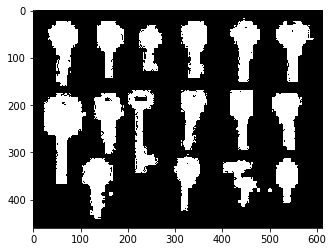

In [5]:
t_keys = thresholding(keys)
plt.imshow(t_keys, cmap="gray")

## Template 

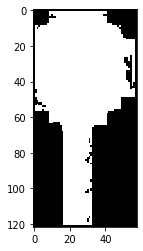

In [6]:
template = t_keys[23:145,135:193]
plt.imshow(template, cmap="gray")

In [7]:
def template_thresholding (img):    
    height = img.shape[0]
    width = img.shape[1]
    
    #[+1.0] for the key and [-1.0] for background
    for i in range(0, height):
        for j in range(0, width):
            if img[i,j] == 0.0:
                img[i,j] = -1.0
            else:
                img[i,j] = +1.0
    
    return img

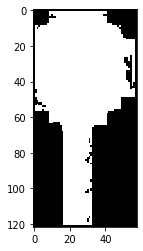

In [8]:
t_template = template_thresholding(template)
plt.imshow(t_template, cmap="gray")

## Cross Correlation

In [13]:
def crossCorrelation(f, I):
    # Handle boundary of I, e.g. pad I according to size of f
    val0 = int((f.shape[0] - 1)/2)
    val1 = int((f.shape[1] - 1)/2)
    I_padded = np.zeros((I.shape[0] + f.shape[0] - 1 , I.shape[1] + f.shape[1] - 1))
    I_padded[val0:-val0, val1:-val1] = I
    
    # Convoluted image output
    I_c = np.zeros_like(I)
  
    # Compute I_convoluted = f*I
    for x in range(I.shape[0]):
        for y in range(I.shape[1]):
            # element-wise multiplication of the filter and the image boxes
            I_c[x, y] = (f*I_padded[x: x + f.shape[0], y: y + f.shape[1]]).sum()
    
    I2 = ((I_c - np.min(I_c)) * (1/(np.max(I_c) - np.min(I_c)) * 1.0)).astype('float')
    return I2

In [14]:
# Convolve our test image with the filters using self made convolution filter 
matched = crossCorrelation(t_template, t_keys)
plt.imshow(matched, cmap='gray')

ValueError: could not broadcast input array from shape (460,612) into shape (461,613)

In [158]:
threshold = np.max(op)
for x in range(op.shape[0]):
    for y in range(op.shape[1]):
        if op[x,y] == threshold:
            print ("The location of maximum peak is: ", x ,", ", y)

The location of maximum peak is:  257 ,  231


In [60]:
def threshold (img, val):    
    height = img.shape[0]
    width = img.shape[1]
    
    # output image 
    op = np.zeros_like(img)
    
    for i in range(0, height):
        for j in range(0, width):
            if img[i,j] > val:
                op[i,j] = 1.0
            else:
                op[i,j] = 0.0
    
    return op

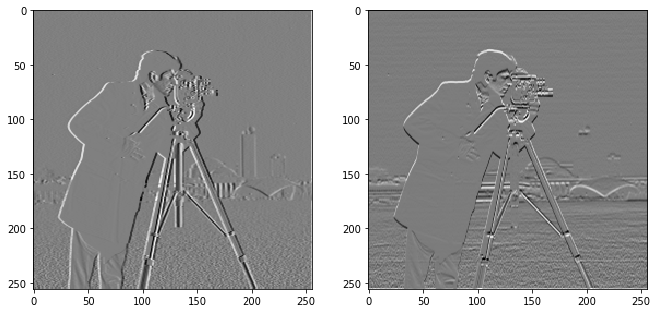

In [61]:
x = np.array([[0,0,0],[-1,0,1],[0,0,0]])
y = np.array([[0,-1,0],[0,0,0],[0,1,0]])
derivative_x = convolution2D(x, cman)
derivative_y = convolution2D(y, cman)

plt.subplots(1,2,figsize=(11,11))
plt.subplot(1,2,1)
plt.imshow(derivative_x, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(derivative_y, cmap='gray')

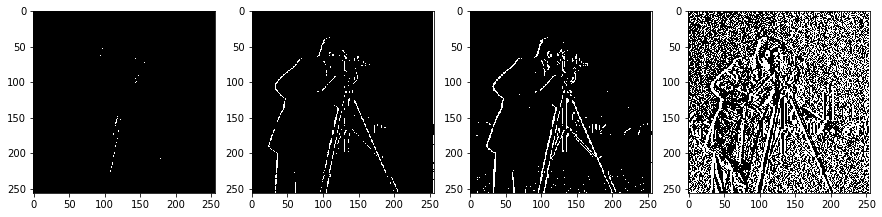

In [68]:
x1 = threshold (derivative_x, 0.9)
x2 = threshold (derivative_x, 0.7)
x3 = threshold (derivative_x, 0.6)
x4 = threshold (derivative_x, 0.5)

plt.subplots(1,4,figsize=(15,15))
plt.subplot(1,4,1)
plt.imshow(x1, cmap='gray')
plt.subplot(1,4,2)
plt.imshow(x2, cmap='gray')
plt.subplot(1,4,3)
plt.imshow(x3, cmap='gray')
plt.subplot(1,4,4)
plt.imshow(x4, cmap='gray')

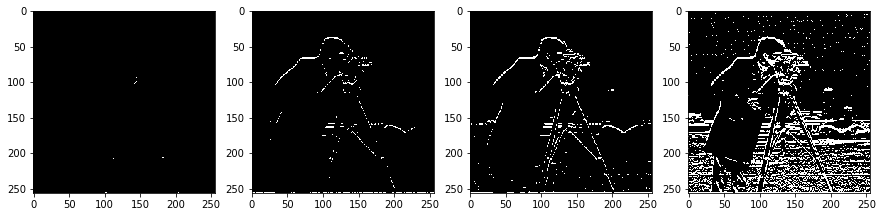

In [69]:
y1 = threshold (derivative_y, 0.9)
y2 = threshold (derivative_y, 0.7)
y3 = threshold (derivative_y, 0.6)
y4 = threshold (derivative_y, 0.5)

plt.subplots(1,4,figsize=(15,15))
plt.subplot(1,4,1)
plt.imshow(y1, cmap='gray')
plt.subplot(1,4,2)
plt.imshow(y2, cmap='gray')
plt.subplot(1,4,3)
plt.imshow(y3, cmap='gray')
plt.subplot(1,4,4)
plt.imshow(y4, cmap='gray')

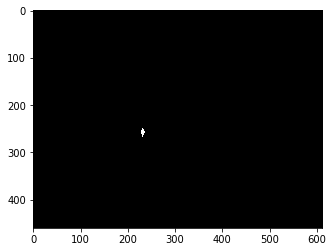

In [90]:
z = threshold (matched, 0.7)
plt.imshow(z, cmap='gray')